# Dataset

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset('amazon_us_reviews', 'Gift_Card_v1_00')
len(dataset)

Found cached dataset amazon_us_reviews (/Users/hcha9747/.cache/huggingface/datasets/amazon_us_reviews/Gift_Card_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

1

In [3]:
train = dataset.get('train')

In [4]:
train[0]

{'marketplace': 'US',
 'customer_id': '24371595',
 'review_id': 'R27ZP1F1CD0C3Y',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'product_category': 'Gift Card',
 'star_rating': 5,
 'helpful_votes': 0,
 'total_votes': 0,
 'vine': 0,
 'verified_purchase': 1,
 'review_headline': 'Five Stars',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31'}

In [5]:
import pandas as pd

df = pd.DataFrame(train)

In [11]:
df.to_excel('./amazon_us_reviews_gift_cards.xlsx', index=False)

In [10]:
! du -h ./amazon_us_reviews_gift_cards.xlsx

 20M	./amazon_us_reviews_gift_cards.xlsx


In [6]:
from jux./amazon_us_reviews_gift_cards.xlsxus import Corpus

corpus = Corpus.from_dataframe(df, col_doc='review_body')

In [7]:
corpus.summary()

,
Corpus Type,Corpus
Number of Documents,149086
Number of Total Words,3685266
Size of Vocabulary,31435
mean Words per Document,24
min Words per Document,0
max Words per Document,1744
metas,"marketplace, customer_id, review_id, product_i..."


In [20]:
corpus.meta.summary()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date
dtype,object,object,object,object,object,object,object,int64,int64,int64,int64,int64,object,datetime64[ns]
sample,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,0,1,Five Stars,2015-08-31 00:00:00
top,US,9374792,R27ZP1F1CD0C3Y,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,0,1,Five Stars,2012-01-28T00:00:00.000000000
top_freq,149086,7,1,28879,37108,37108,149086,129709,143501,141887,149086,136042,41804,2107
uniqs,US,"24371595, 42489718, 861463, 25283295, 397970, ...","R27ZP1F1CD0C3Y, RJ7RSBCHUDNNE, R1HVYBSKLQJI5S,...","B004LLIL5A, B004LLIKVU, B00IX1I3G6, B005ESMGV4...","346014806, 473048287, 926539283, 379368939, 32...","Amazon eGift Card - Celebrate, Amazon.com eGif...",Gift Card,"5, 1, 4, 2, 3","0, 1, 2, 3, 6, 4, 7, 30, 8, 18, 241, 99, 5, 12...","0, 1, 2, 3, 7, 6, 8, 32, 4, 9, 21, 248, 113, 5...",0,"1, 0","Five Stars, Gift card for the greatest selecti...","2015-08-31T00:00:00.000000000, 2015-08-30T00:0..."
num_uniqs,1,143181,149086,1780,1197,1197,1,5,163,182,1,2,58232,2016
mean,,,,,,,,4.731363,0.396603,0.489449,0.0,0.912507,,2014-01-30 02:16:17.186321920
std,,,,,,,,0.829306,20.649231,22.766277,0.0,0.282557,,436 days 10:38:08.916551416
min,,,,,,,,1,0,0,0,0,,2004-10-14 00:00:00
25%,,,,,,,,5.0,0.0,0.0,0.0,1.0,,2013-03-30 00:00:00


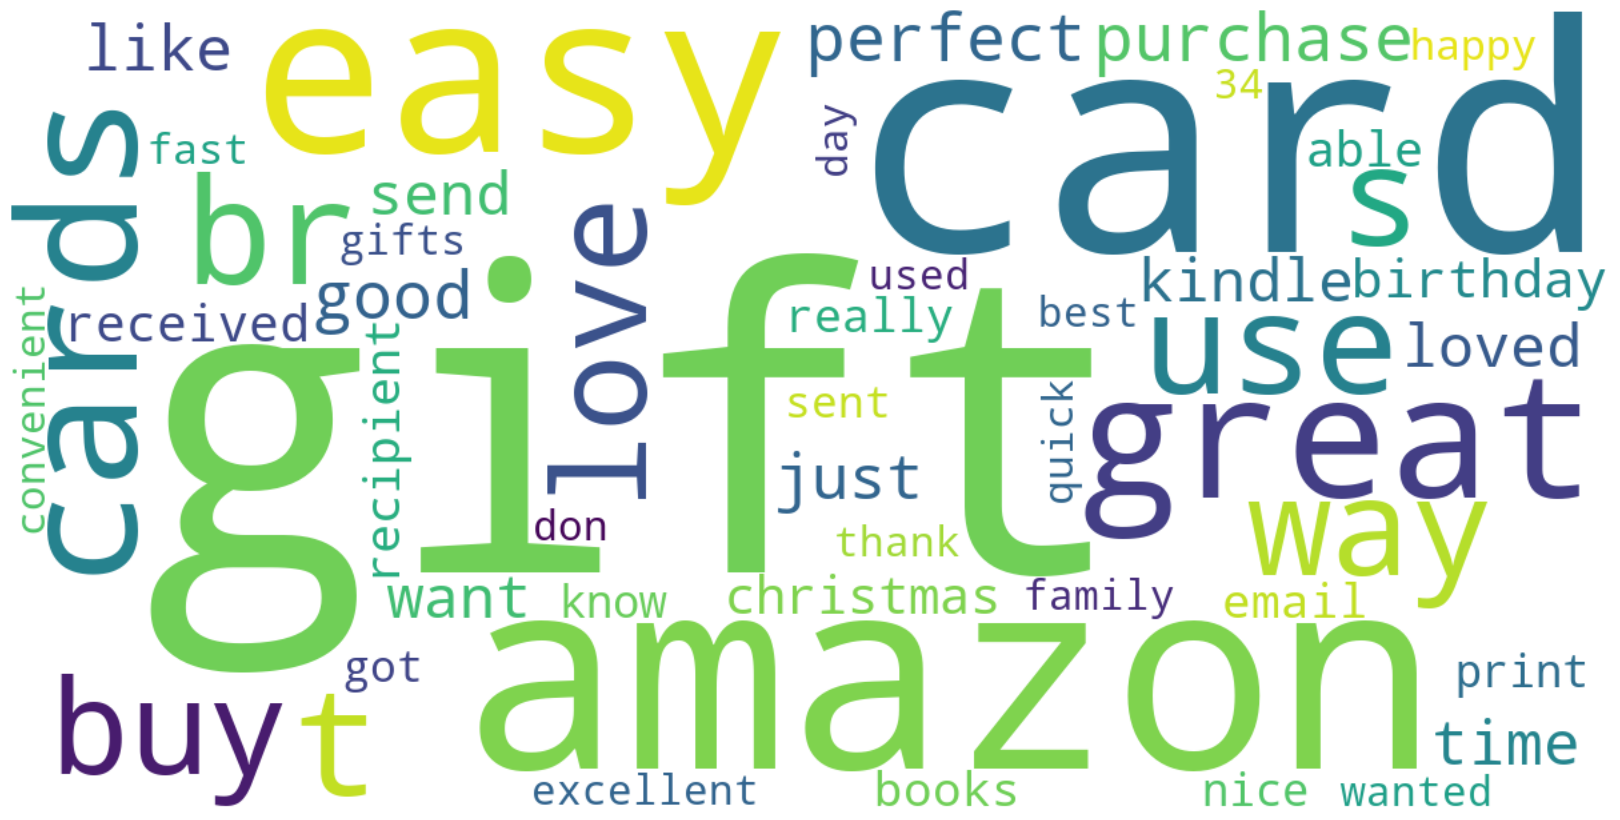

In [8]:
corpus.viz.wordcloud('tf')

In [9]:
corpus.meta.get('review_date').astype('datetime')

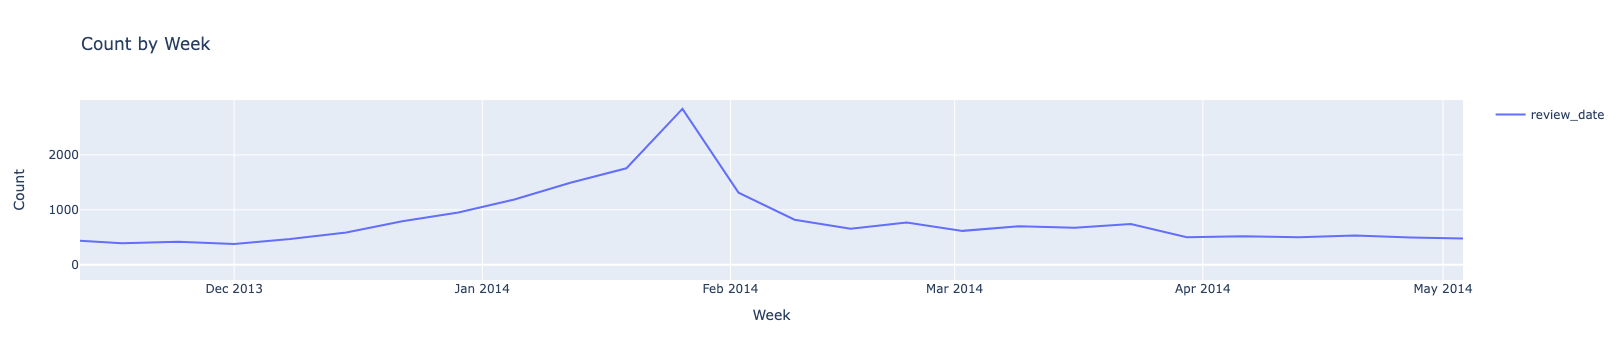

In [12]:
corpus.viz.timeline('review_date', freq='1w')

In [16]:
jan_2012 = corpus.slicer.filter_by_datetime('review_date', start='22-jan-2012', end='12-feb-2012')
jan_2012.name = 'jan_2012'
jan_2014 = corpus.slicer.filter_by_datetime('review_date', start='01-dec-2013', end='16-feb-2014')
jan_2014.name = 'jan_2014'

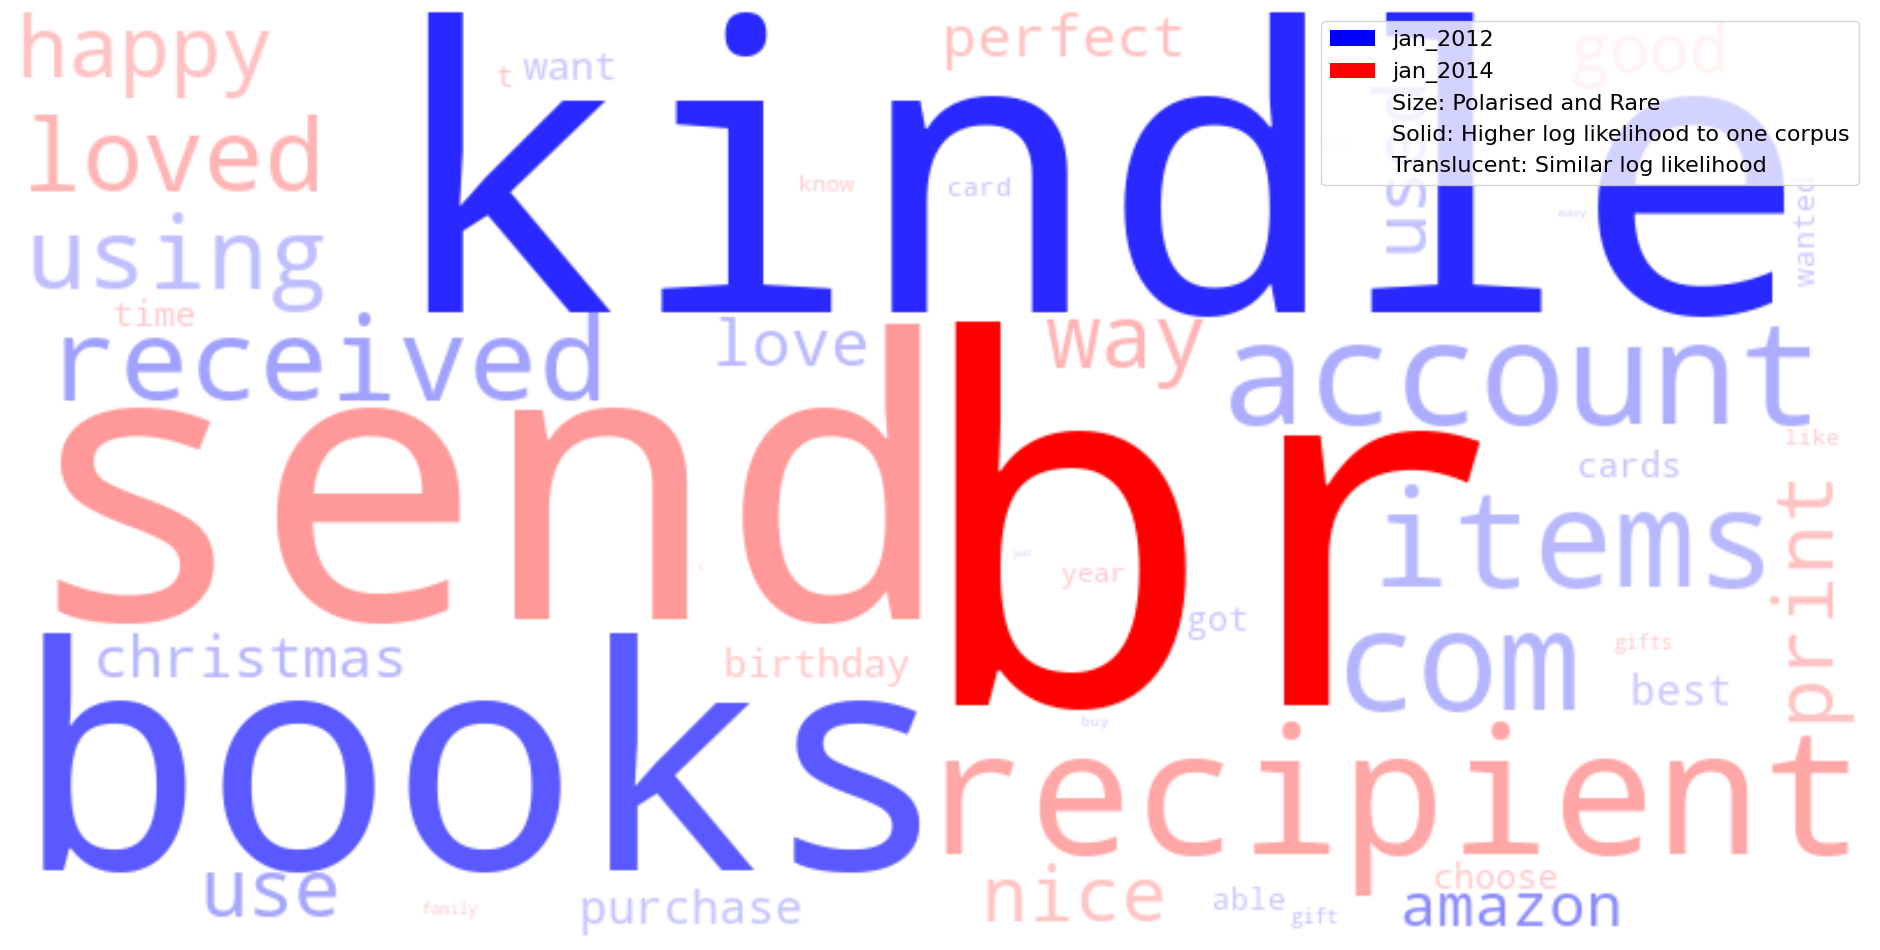

In [19]:
from juxtorpus import Jux

jux = Jux(jan_2012, jan_2014)
jux.polarity.wordcloud('log_likelihood')